<a href="https://colab.research.google.com/github/comandi1969/AIFFEL_Online_Quest/blob/main/DL_Master/%EB%94%A5%ED%95%9C%EB%81%9D_10%EC%9E%A5_%EB%A1%9C%EC%9D%B4%ED%84%B0_%EC%B5%9C%EC%A0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [2]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data, val_data, train_labels, val_labels = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.25,
                                                  random_state=123)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

2110848/2110848 [==============================] - 0s 0us/step
6736
2246
2246
46


In [3]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
from tensorflow.keras import utils

y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

In [4]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization()) # 배치 정규화
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5)) # 드롭아웃 추가
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization()) # 배치 정규화
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5)) # 드롭아웃 추가
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 hidden (Dense)              (None, 128)               16512     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                        

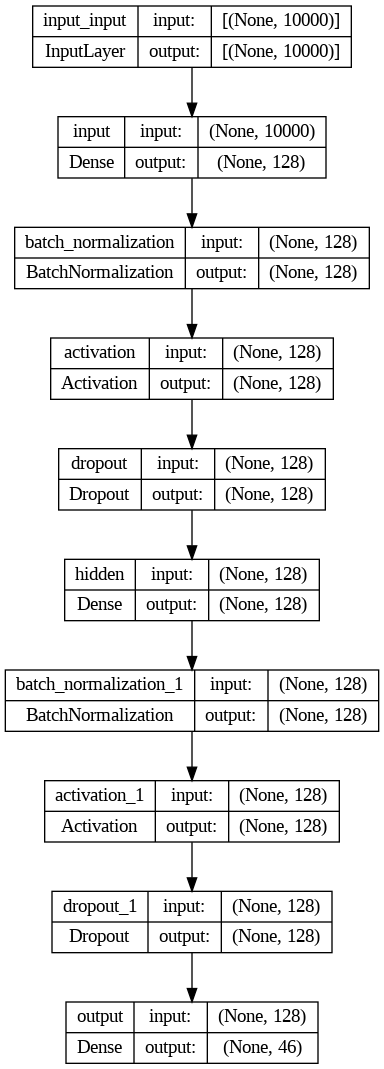

In [5]:
model.summary()
utils.plot_model(model, show_shapes=True)

In [6]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('reuters_best_model.h5', save_best_only=True)

history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/30
14/14 [==============================] - 8s 160ms/step - loss: 2.8019 - accuracy: 0.3965 - val_loss: 3.2920 - val_accuracy: 0.6385
Epoch 2/30
14/14 [==============================] - 1s 104ms/step - loss: 1.6523 - accuracy: 0.6453 - val_loss: 3.0913 - val_accuracy: 0.6977
Epoch 3/30
14/14 [==============================] - 1s 105ms/step - loss: 1.3168 - accuracy: 0.7093 - val_loss: 2.8386 - val_accuracy: 0.7110
Epoch 4/30
14/14 [==============================] - 1s 91ms/step - loss: 1.1250 - accuracy: 0.7417 - val_loss: 2.6255 - val_accuracy: 0.7204
Epoch 5/30
14/14 [==============================] - 1s 93ms/step - loss: 0.9647 - accuracy: 0.7760 - val_loss: 2.3837 - val_accuracy: 0.7177
Epoch 6/30
14/14 [==============================] - 1s 104ms/step - loss: 0.8563 - accuracy: 0.7956 - val_loss: 2.1668 - val_accuracy: 0.7115
Epoch 7/30
14/14 [==============================] - 1s 92ms/step - loss: 0.7651 - accuracy: 0.8125 - val_loss: 1.9999 - val_accuracy: 0.7324
Epoch 8/3

<ipython-input-7-ef4da0309378>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


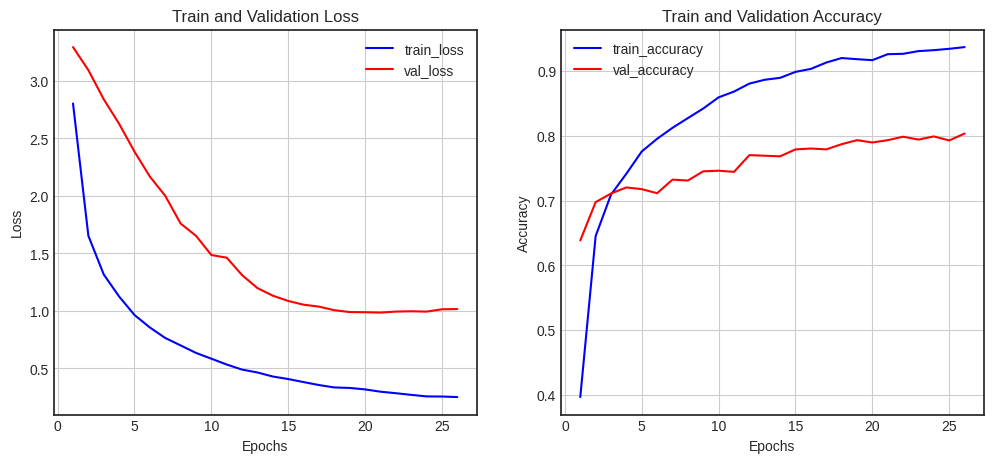

In [7]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [8]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
loss , accuracy = model.evaluate(x_test, y_test)
#print(f'loss => {loss}')
#print(f'accuracy => {accuracy}')

pred_ys = model.predict(x_test)

arg_pred_y = np.argmax(pred_ys, axis=1)
print(arg_pred_y[5])
print(np.argmax(y_test[5]))

71/71 [==============================] - 0s 4ms/step
3
3
